In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import os
from tueplots import bundles
from tueplots.constants.color import rgb
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

In [3]:
class DataContainer:
    # Taken from calculator/DataLoader.py
    def __init__(self, dataset_folder_path="../dataset/csv", start_year=1991, end_year=2021):
        self.data = {"Reference Numbers.csv": self.interpolate_gap(pd.read_csv(os.path.join(dataset_folder_path, "Reference Numbers.csv"), sep=';', dtype=np.float64, na_values="-"), start_year, end_year)}
        for file_name in os.listdir(dataset_folder_path):
            if file_name == "Reference Numbers.csv":
                continue
            if file_name.endswith("csv"):
                interpolated_data = self.interpolate_gap(pd.read_csv(os.path.join(dataset_folder_path, file_name), sep=';', dtype=np.float64, na_values="-"), start_year, end_year)
                self.data[file_name] = interpolated_data

    def interpolate_gap(self, df: pd.DataFrame, start_year: int, end_year: int):
        years = {"Year": list(range(start_year, end_year + 1))}
        new_df = pd.DataFrame(years, columns=df.columns)
        for _, row_data in df.iterrows():
            row_year = row_data.iloc[0]
            # the year of the row is in the given range
            if start_year <= row_year <= end_year:
                new_df.iloc[int(row_year - start_year)] = row_data
        lin_interpolated = new_df.infer_objects(copy=False).interpolate()
        self.lin_interpolate_start_points(lin_interpolated)
        return lin_interpolated

    def lin_interpolate_start_points(self, df: pd.DataFrame):
        for column_index, column_series in df.items():
            nan_mask = column_series.isna()
            if nan_mask.any():
                for index in range(column_series.size):
                    if not nan_mask.iloc[index]:
                        delta = column_series.iloc[index + 1] - column_series.iloc[index]
                        for sub_index in range(index):
                            # linear regression for all values above index
                            df.loc[sub_index, column_index] = column_series.iloc[index] + delta * (sub_index - index)
                        break

In [4]:
data = DataContainer(dataset_folder_path="../dataset/csv")

accidents = data.data["Accident Numbers.csv"]
reference = data.data["Reference Numbers.csv"]
death = data.data["Deaths.csv"]
injured = data.data["Injured Persons 2.csv"]
deaths = data.data["Deaths.csv"]
causer = data.data["Main Causer.csv"]
causes = data.data["Accident Causes.csv"]

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


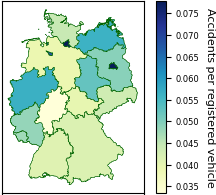

In [18]:
# Figure 1: Germany Accidents
accidents_state = pd.read_csv("../dataset/shape_files/Accidents by State.csv", sep=";")
registered_vehicles_state = pd.read_csv("../dataset/shape_files/Registered Vehicles by State.csv", sep=";")

plt.rcParams.update(bundles.icml2022(column="half", nrows=1, ncols=1, usetex=False))
# EU shape file
path = "../dataset/shape_files/NUTS_RG_01M_2021_3035.shp"
gdf = gpd.read_file(path)
gdf.crs = "EPSG:3035"   # specify CRS (see the filename)
gdf_de = gdf[gdf.CNTR_CODE == "DE"]     # Take Germany
gdf_de = gdf_de.loc[gdf_de.LEVL_CODE <= 1]      # Only states and national border

states = gdf_de['NAME_LATN'][1:].values.tolist()
# berlin_ratio = (accidents_state[states]/registered_vehicles_state[states]).iloc[25]["Berlin"] # 0.102
state_short = ["NW","HE","BW","ST","TH","SN","RP","BB","NI","BY","MV","SH","SL","BE","HB","HH"]
idx = states.index("Berlin")
states.remove("Berlin")

im = plt.imshow((accidents_state[states].iloc[25]/registered_vehicles_state[states].iloc[2]).values[None, :], cmap="YlGnBu")
plt.close()
colors =  im.cmap(im.norm(im.get_array())).tolist()[0]
colors.insert(idx, np.min(colors, 0))

# plot borders between the states green
ax = gdf_de.plot(color= [(1, 1, 1, 1), *colors])
ax.set_xticks([])
ax.set_yticks([])
# for i, shape in enumerate(gdf_de["geometry"].iloc[1:]):
#     ax.text(shape.centroid.x-30000, shape.centroid.y, state_short[i], color='brown')

# ax.set_title("No. of accidents per registered vehicle for each state in Germany (2016)")
# ax.set_xlabel(f"*Berlin: {berlin_ratio:0.3f}", loc="right")

cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Accidents per registered vehicle", rotation=-90, va="bottom")

gdf_de.boundary.plot(color="darkgreen", ax=ax, linewidth=0.3)
plt.savefig("Germany-Accidents.pdf")
plt.show()

In [46]:
# print(all(accidents["Total"] - accidents["only property damage"] == accidents["with damage to people"]))

# ax = plt.axes()
# ax.plot(accidents["Year"], accidents["Total"], 'o-', label="Total accidents")
# ax.plot(accidents["Year"], accidents["only property damage"], 'o-', label="Only Property damage accidents")
# ax.grid()
# ax.set_title("Accidents in a year")
# ax.legend()
# plt.show()

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


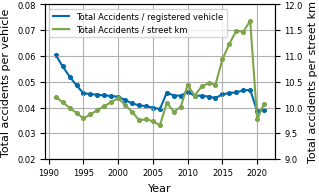

In [47]:
# Figure 2 - Total Accidents
plt.rcParams.update(bundles.icml2022(column="half", nrows=1, ncols=1, usetex=False))

ax = plt.axes()
l1 = ax.plot(accidents["Year"], accidents["Total"]/reference["total registered vehicles"], "-", color=rgb.tue_blue, label="Total Accidents / registered vehicle")
ax.scatter(accidents["Year"], accidents["Total"]/reference["total registered vehicles"], s=7, color=rgb.tue_blue)
ax.set_ylim(0.02, 0.08)
ax.set_ylabel("Total accidents per vehicle")
ax.set_ylim(0.02, 0.08)
ax2 = ax.twinx()
l2 = ax2.plot(accidents["Year"], accidents["Total"]/reference["total street km"], "-", color=rgb.tue_green, label="Total Accidents / street km")
ax2.scatter(accidents["Year"], accidents["Total"]/reference["total street km"], s=7, color=rgb.tue_green)
ax2.set_ylabel("Total accidents per street km")
ax2.set_ylim(9, 12)
ax.grid()

ax.set_xlabel("Year")
l = l1 + l2
ax.legend(l, [i.get_label() for i in l], loc="upper left")
plt.savefig("Total-Accidents.pdf")
plt.show()

In [212]:
print("2000-2019 Total accident/registered vehicles Mean:", (accidents["Total"]/reference["total registered vehicles"]).loc[(accidents["Year"]>2000)].mean())
print("2000-2019 Total accident/registered vehicles Std: ", (accidents["Total"]/reference["total registered vehicles"]).loc[(accidents["Year"]>2000)].std())

2000-2019 Total accident/registered vehicles Mean: 0.043438154246890834
2000-2019 Total accident/registered vehicles Std:  0.0026762459113929445


findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


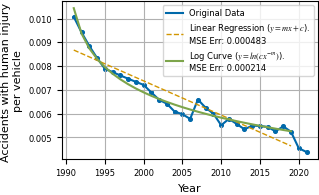

In [48]:
# Figure 3 - Accidnets Damage People
plt.rcParams.update(bundles.icml2022(column="half", nrows=1, ncols=1, usetex=False))

ax = plt.axes()
# ax.set_title("Accidents with damage to people per registered vehicle")
ax.plot(accidents["Year"], accidents["with damage to people"]/reference["total registered vehicles"], '-', label="Original Data", color=rgb.tue_blue)
ax.scatter(accidents["Year"], accidents["with damage to people"]/reference["total registered vehicles"], s=7, color=rgb.tue_blue)
ref_year = 1991

#Linear Regression
lr_log = LinearRegression()
x = (accidents["Year"]-ref_year+1).values.reshape(-1, 1)[ref_year-1991:-2]
y = (accidents["with damage to people"]/reference["total registered vehicles"])[ref_year-1991:-2]
lr_log.fit(x, y)
y_ = lr_log.predict(x)
ax.plot(accidents["Year"][ref_year-1991:-2], lr_log.predict(x), '--', label=r"Linear Regression ($y=mx+c$)."+f"\nMSE Err: {np.mean((y_ - y)**2)**0.5:.6f}", linewidth=1, color=rgb.tue_orange)

# lr = LinearRegression()
# x = [np.log((accidents["Year"]-ref_year+1).values[ref_year-1991:-2])]
# x = np.array(x).reshape(-1, len(x))
# y = (accidents["with damage to people"]/reference["total registered vehicles"])[ref_year-1991:-2]
# lr.fit(x, np.log(y))
# y_ = lr.predict(x)
# ax.plot(accidents["Year"][ref_year-1991:-2], np.e ** y_, label=r"Inverse Power Curve ($y=cx^{-m}$). ")# + f" MSE Err: {np.mean((np.e ** y_ - y)**2)**0.5:.5f}")

lr_log = LinearRegression()
x = [np.log((accidents["Year"]-ref_year+1).values[ref_year-1991:-2])]
x = np.array(x).reshape(-1, len(x))
y = (accidents["with damage to people"]/reference["total registered vehicles"])[ref_year-1991:-2]
lr_log.fit(x, y)
y_ = lr_log.predict(x)
ax.plot(accidents["Year"][ref_year-1991:-2], y_, label=r"Log Curve ($y=ln(cx^{-m})$)." + f"\nMSE Err: {np.mean((y_ - y)**2)**0.5:.6f}", color=rgb.tue_green)

ax.set_xlabel("Year")
ax.set_ylabel("Accidents with human injury \nper vehicle")

ax.grid()
ax.legend()
plt.savefig("Accidnets-Damage-People.pdf")
plt.show()

In [214]:
# ax = plt.axes()
# ax.set_title("Accidents with damage to people per street km")
# ax.plot(accidents["Year"], accidents["with damage to people"]/reference["total street km"], 'o-', label="Original Data")
# ax.grid()
# plt.show()

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


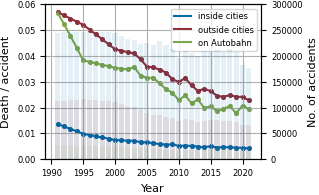

In [29]:
# Figure 4 - Accidents Deaths street
plt.rcParams.update(bundles.icml2022(column="half", nrows=1, ncols=1, usetex=False))

# ax = axes[0]
# ax.plot(accidents["Year"], accidents["inside cities"], label="inside cities")
# ax.plot(accidents["Year"], accidents["outside cities without Autobahn"], label="outside cities without Autobahn")
# ax.plot(accidents["Year"], accidents["on Autobahn"], label="on Autobahn")
# ax.set_title("Accidents based on type of street")
# ax.legend()
# ax.grid()
# plt.show()

# ax = plt.axes()
# ax = axes[0]
# ax.plot(accidents["Year"], accidents["inside cities"]/reference["street km inside cities"], label="inside cities", color=rgb.tue_blue)
# ax.scatter(accidents["Year"], accidents["inside cities"]/reference["street km inside cities"], s=7, color=rgb.tue_blue)
# ax.plot(accidents["Year"], accidents["outside cities without Autobahn"]/reference["street km outside cities without Autobahn"], label="outside cities", color=rgb.tue_orange)
# ax.scatter(accidents["Year"], accidents["outside cities without Autobahn"]/reference["street km outside cities without Autobahn"], s=7, color=rgb.tue_orange)
# ax.plot(accidents["Year"], accidents["on Autobahn"]/reference["street km Autobahn"], label="on Autobahn", color=rgb.tue_green)
# ax.scatter(accidents["Year"], accidents["on Autobahn"]/reference["street km Autobahn"], s=7, color=rgb.tue_green)
# # ax.set_title("Accidents based on type of street per street km")
# ax.legend()
# ax.grid()
# ax.set_ylabel("Accidents / street km")
# ax.set_xlabel("Year\n(a)")
# plt.show()

ax = plt.axes()


ax.plot(accidents["Year"], death["inside cities"]/accidents["inside cities"], label="inside cities", color=rgb.tue_blue)
ax.scatter(accidents["Year"], death["inside cities"]/accidents["inside cities"], s=7, color=rgb.tue_blue)
ax.plot(accidents["Year"], death["outside cities excl Autobahn"]/accidents["outside cities without Autobahn"], label="outside cities", color=rgb.tue_red)
ax.scatter(accidents["Year"], death["outside cities excl Autobahn"]/accidents["outside cities without Autobahn"], s=7, color=rgb.tue_red)
ax.plot(accidents["Year"], death["Autobahn"]/accidents["on Autobahn"], label="on Autobahn", color=rgb.tue_green)
ax.scatter(accidents["Year"], death["Autobahn"]/accidents["on Autobahn"], s=7, color=rgb.tue_green)

keys = ["inside cities", "outside cities without Autobahn", "on Autobahn"]
colors = [rgb.tue_blue, rgb.tue_red, rgb.tue_green]

ax2 = ax.twinx()
for k, c in zip(keys, colors):
    ax2.bar(accidents["Year"], accidents[k], color=(*c, 0.1))

ax.set_ylim(0, 0.06)
ax2.set_ylim(0, 3e5)
ax2.set_ylabel("No. of accidents")
# ax.set_title("Death per accident based on type of street")
ax.legend()
ax.grid()
ax.set_ylabel("Death / accident")
ax.set_xlabel("Year")

plt.savefig("Accidents-Deaths-street.pdf")
plt.show()

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


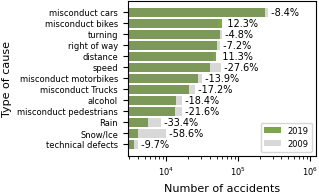

In [44]:
# Figure 5 - Accident Causes
plt.rcParams.update(bundles.icml2022(column="half", nrows=1, ncols=1, usetex=False))
ax = plt.subplot()

l = []
cols = []
for col in causes.columns:
    if "total" in col or "Year" == col or "car driver misconduct" == col or "car " in col:
        continue
    l.append(causes[col].values[2019-1991])
    cols.append(col)

idxs = np.argsort(l)
cols = np.array(cols)[idxs]
bar2019 = ax.barh(cols, np.array(l)[idxs], color=rgb.tue_green, label="2019")

l = []
for col in cols:
    l.append(causes[col].values[2009-1991])

bar2000 = ax.barh(cols, l, color=(0.5, 0.5, 0.5, 0.3), label="2009")
percs = {x: y for x,y in zip(bar2000.datavalues, ((bar2019.datavalues - bar2000.datavalues)/bar2000.datavalues)*100)}
ax.bar_label(bar2000, fmt=lambda x: f" {percs[x]:.1f}%" if percs[x] < 0 else f" {''.join([' ']*int(percs[x]/5))}{percs[x]:.1f}%", fontsize=7)
ax.set_xlabel("Number of accidents")
ax.set_ylabel("Type of cause")
ax.set_xscale('log')
ax.set_xlim(right=1.2e6)

plt.legend()
plt.savefig("Accident-Causes.pdf")
plt.show()

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


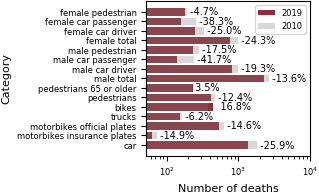

In [36]:
# Figure 5 - Accident Deaths
# matplotlib.rcParams.update(matplotlib.rcParamsDefault)
plt.rcParams.update(bundles.icml2022(column="half", nrows=1, ncols=1, usetex=False))
ax = plt.subplot()

l = []
cols = []
for col in deaths.columns[:-8]:
    if "Year" == col or "car 18 to 25" == col:
        continue
    l.append(deaths[col].values[2019 - 1991])
    cols.append(col)

# idxs = np.argsort(l)
# cols = np.array(cols)[idxs]
bar2019 = ax.barh(cols, l, color=rgb.tue_red, label="2019")

l = []
for col in cols:
    l.append(deaths[col].values[2010 - 1991])

bar2000 = ax.barh(cols, l, color=(0.5, 0.5, 0.5, 0.3), label="2010")
percs = {x: y for x, y in zip(bar2000.datavalues, ((bar2019.datavalues - bar2000.datavalues) / bar2000.datavalues) * 100)}
ax.bar_label(bar2000, fmt=lambda x: f" {percs[x]:.1f}%" if percs[x] < 0 else f" {''.join([' ']*int(percs[x]/5))}{percs[x]:.1f}%", fontsize=7)
ax.set_xlabel("Number of deaths")
ax.set_ylabel("Category")
ax.set_xscale("log")
ax.set_xlim(right=10e3)

plt.legend()
plt.savefig("Accident-Deaths.pdf")
plt.show()